In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')
import numpy as np




In [121]:
df= pd.read_csv(r"C:\Users\Ramy\Downloads\creditcard_csv.csv")

In [122]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [123]:
df.dtypes[-1]

dtype('int64')

In [124]:
df.isnull().sum()>0

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

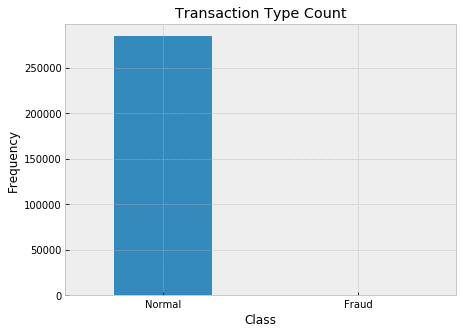

<Figure size 1008x576 with 0 Axes>

In [125]:
ax=pd.value_counts(df['Class'])
ax.plot(kind = 'bar',rot=0,figsize=(7,5))

plt.title("Transaction Type Count")
plt.xticks(range(2),["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency")


plt.figure(figsize=(14,8))
plt.show()



In [7]:
pd.value_counts(df['Class'])

0    284315
1       492
Name: Class, dtype: int64

In [8]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]

In [9]:
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

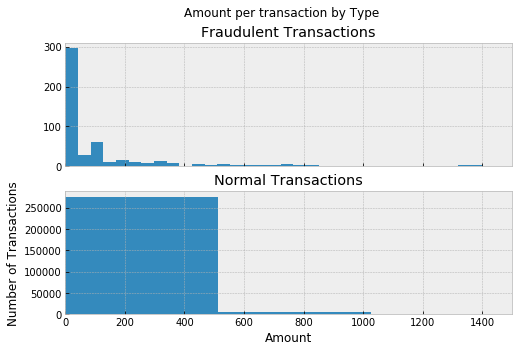

In [126]:
#I dont know if were using this

ax, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,5),sharex=True)
ax.suptitle('Amount per transaction by Type')

ax1.hist(fraud["Amount"], bins = 50)
ax1.set_title('Fraudulent Transactions')


ax2.hist(normal["Amount"], bins = 50)
ax2.set_title('Normal Transactions')


plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 1500))
#plt.yscale('log')

plt.show()


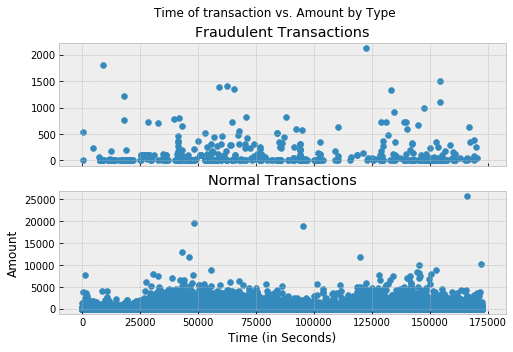

In [127]:
ax, (ax1, ax2) = plt.subplots(2, 1,figsize=(8,5),sharex=True)
ax.suptitle('Time of transaction vs. Amount by Type')

ax1.scatter(fraud['Time'], fraud['Amount'])
ax1.set_title('Fraudulent Transactions')

ax2.scatter(normal['Time'], normal['Amount'])
ax2.set_title('Normal Transactions')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [12]:
#scaling Amount

from sklearn.preprocessing import StandardScaler

df1= df.drop(['Time'], axis=1)

scaler= StandardScaler()

df1['Amount'] = scaler.fit_transform(df1['Amount'].values.reshape(-1, 1))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df1,
                                   test_size=0.2,
                                   random_state=0)


X_train = X_train[X_train['Class'] == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

In [14]:
X_train = X_train.values
X_test = X_test.values

input_dim = X_train.shape[1]
encoding_dim = 14

In [23]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras import regularizers

input_layer = Input(shape=(X_train.shape[1], ))

encoder1 = Dense(14, activation="sigmoid", kernel_initializer= "glorot_uniform",activity_regularizer=regularizers.l1(0.0003))(input_layer)
encoder2 = Dense(7, activation="relu", kernel_initializer= "glorot_uniform")(encoder1)
#encoder3 = Dense(7, activation="relu",kernel_initializer= "glorot_uniform")(encoder2)


decoder1 = Dense(7, activation='sigmoid',kernel_initializer= "glorot_uniform")(encoder2)
#decoder2 = Dense(7, activation='relu',kernel_initializer= "glorot_uniform")(decoder1)
decoder2 = Dense(X_train.shape[1], activation='relu',kernel_initializer= "glorot_uniform")(decoder1)


autoencoder = Model(inputs=input_layer, outputs=decoder2)

In [24]:
from keras.callbacks import ModelCheckpoint, TensorBoard


autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath=r"C:\Users\Ramy\Desktop\AI\autoencode.h", verbose=0, save_best_only=True)

tensorboard = TensorBoard(log_dir=r"C:\Users\Ramy\Desktop\AI\logs", histogram_freq=0, write_graph=True, write_images=True)
#early_stop = EarlyStopping(monitor=’loss’, patience=2, verbose=0, mode='min')

history = autoencoder.fit(X_train, X_train,
                    epochs= 20,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpoint, tensorboard]).history

Train on 227454 samples, validate on 56962 samples
Epoch 1/20
227454/227454 [==============================] - 20s 86us/step - loss: 0.9171 - accuracy: 0.3914 - val_loss: 0.9190 - val_accuracy: 0.4691
Epoch 2/20
227454/227454 [==============================] - 18s 77us/step - loss: 0.8372 - accuracy: 0.4910 - val_loss: 0.8891 - val_accuracy: 0.5089
Epoch 3/20
227454/227454 [==============================] - 18s 78us/step - loss: 0.8143 - accuracy: 0.5258 - val_loss: 0.8679 - val_accuracy: 0.5479
Epoch 4/20
227454/227454 [==============================] - 15s 67us/step - loss: 0.7953 - accuracy: 0.5520 - val_loss: 0.8566 - val_accuracy: 0.5507
Epoch 5/20
227454/227454 [==============================] - 15s 67us/step - loss: 0.7868 - accuracy: 0.5570 - val_loss: 0.8497 - val_accuracy: 0.5559
Epoch 6/20
227454/227454 [==============================] - 16s 72us/step - loss: 0.7780 - accuracy: 0.5622 - val_loss: 0.8363 - val_accuracy: 0.5630
Epoch 7/20
227454/227454 [=======================

In [25]:
autoencoder = load_model(r"C:\Users\Ramy\Desktop\AI\autoencode.h")

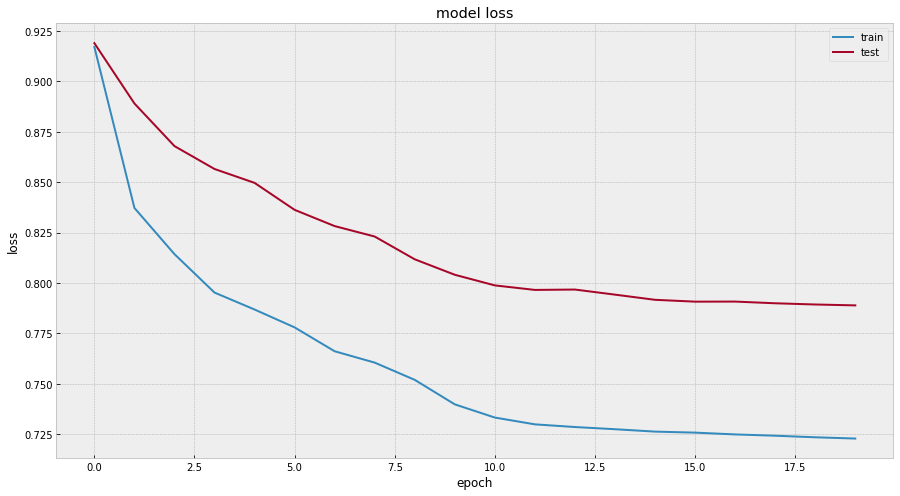

In [128]:
plt.figure(figsize=(15, 8))
plt.plot(history['loss'])
plt.plot(history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [27]:
predictions = autoencoder.predict(X_test)

In [83]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [84]:
pd.value_counts(error_df['true_class'])

0    56861
1      101
Name: true_class, dtype: int64

In [86]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.785938,0.001773
std,7.570418,0.042071
min,0.045028,0.000000
25%,0.247930,0.000000
50%,0.402006,0.000000
75%,0.649326,0.000000
max,1585.496957,1.000000


Text(0.5, 0, 'Reconstruction Error')

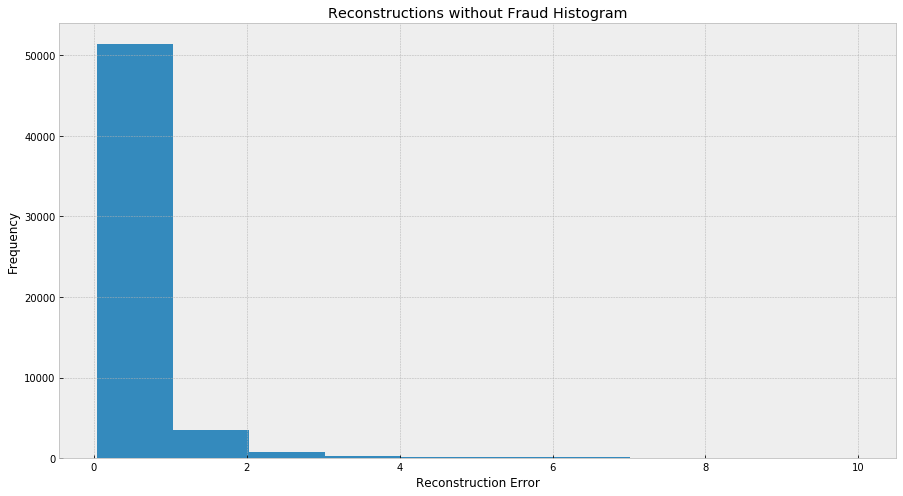

In [129]:
#reconstruction without fraud

fig = plt.figure(figsize=(15, 8)).add_subplot()

normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]

fig.hist(normal_error_df.reconstruction_error.values, bins=10)

plt.title('Reconstructions without Fraud Histogram')
plt.ylabel('Frequency')
plt.xlabel('Reconstruction Error')

Text(0.5, 0, 'Reconstruction Error')

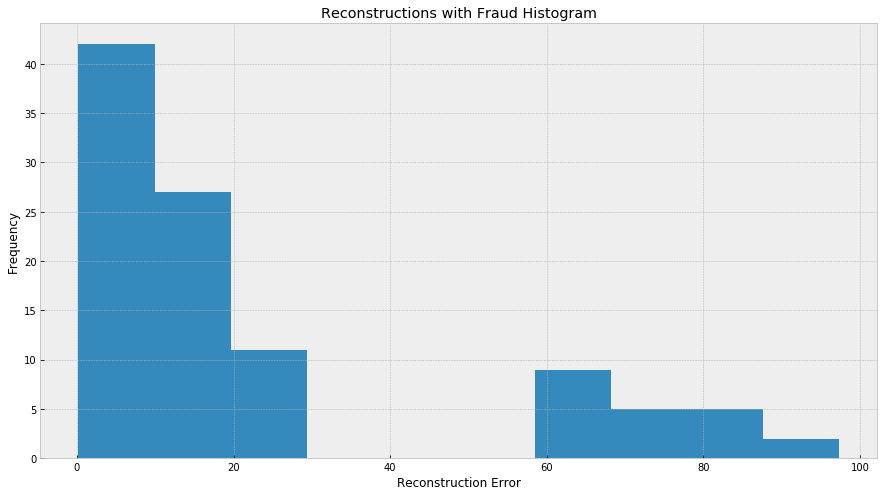

In [130]:
fig = plt.figure(figsize=(15, 8)).add_subplot()

fraud_error_df = error_df[error_df['true_class'] == 1]

fig.hist(fraud_error_df.reconstruction_error.values, bins=10)
plt.title('Reconstructions with Fraud Histogram')
plt.ylabel('Frequency')
plt.xlabel('Reconstruction Error')

In [32]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

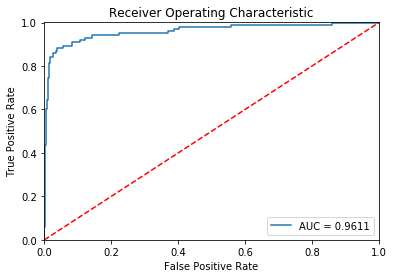

In [74]:
#I dont think we should have this
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Text(0, 0.5, 'Precision')

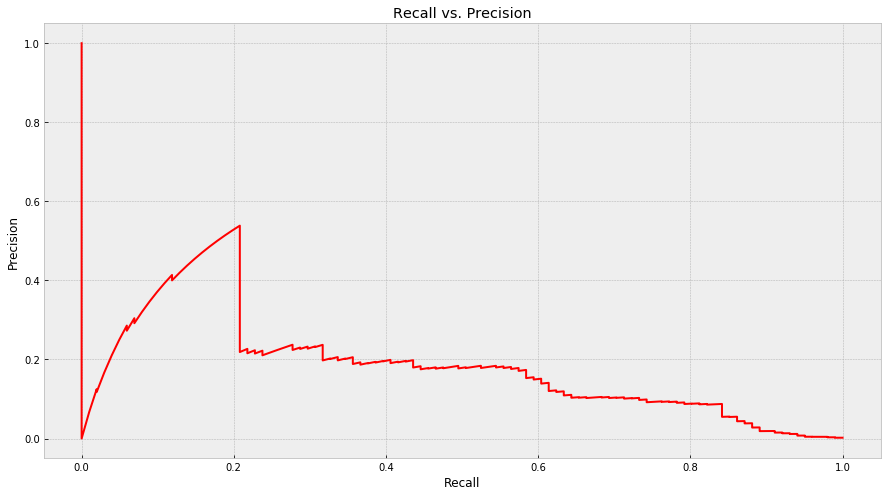

In [131]:
precision, recall, thresh = precision_recall_curve(error_df["true_class"],
                                               error_df["reconstruction_error"])
plt.figure(figsize=(15, 8))

plt.plot(recall, precision, 'r')

plt.title('Recall vs. Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')


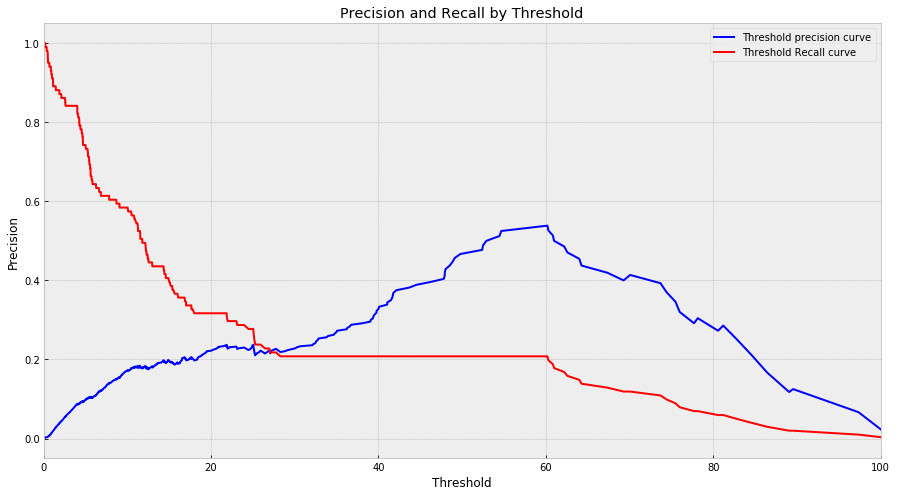

In [179]:
plt.figure(figsize=(15, 8))

plt.plot(th, precision[:-1], 'b',
         label='Threshold precision curve')

plt.title('Precision by Threshold ')
plt.plot(thresh, recall[:-1], 'r',
         label='Threshold Recall curve')

plt.title('Precision and Recall by Threshold')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')

plt.xlabel('Threshold')
plt.xlim(0,100)
plt.ylabel('Precision')
plt.legend(loc='upper right')


Text(0, 0.5, 'Recall')

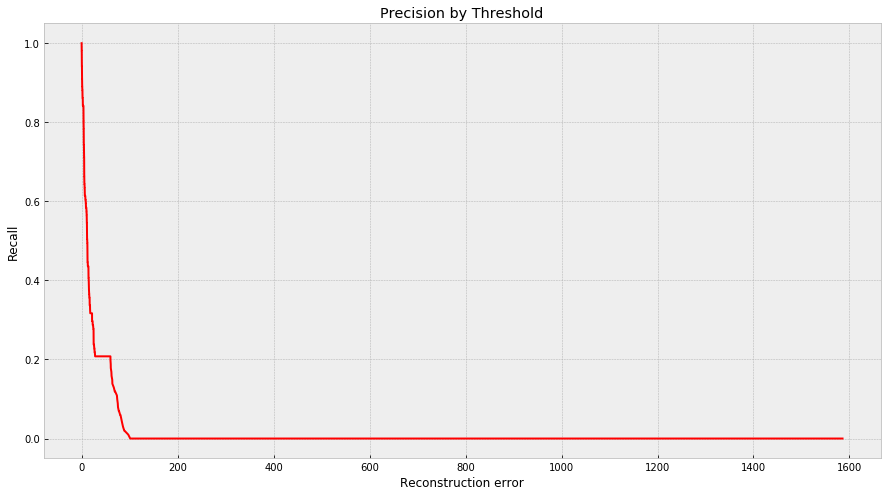

In [133]:
plt.figure(figsize=(15, 8))

plt.plot(thresh, recall[:-1], 'r',
         label='Threshold-Recall curve')

plt.title('Precision by Threshold')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')


Text(0.5, 0, 'Data point index')

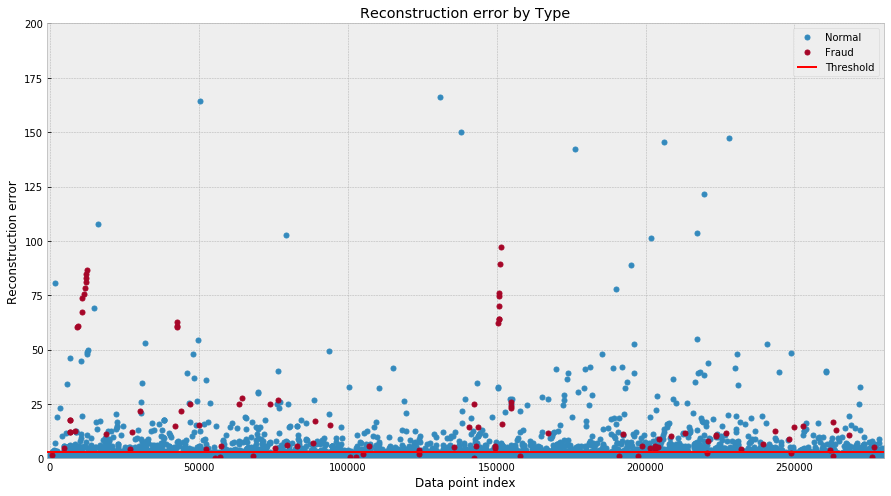

In [190]:
threshold = 3

groups = error_df.groupby('true_class')

fig, ax = plt.subplots(figsize=(15, 8))

#labeling datapoint

for name, group in groups:
    ax.plot(group.index,
            group.reconstruction_error,
            marker='o',
            ms=5,
            linestyle='',
            label= "Fraud"  if name == 1 else "Normal")


ax.hlines(threshold, -1000, 280000, colors="r", zorder=100, label='Threshold')
ax.legend()


plt.ylim(0,200)
plt.xlim(-1000,280000)

plt.title("Reconstruction error by Type")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")


Text(0.5, 36.5, 'Predicted class')

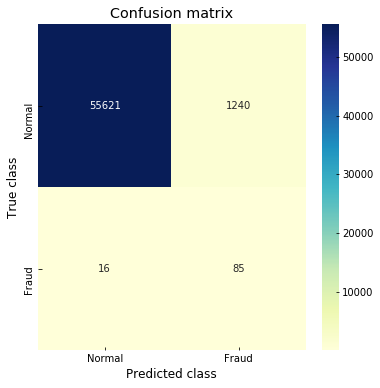

In [191]:
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df['reconstruction_error'].values]

conf_matrix = confusion_matrix(error_df['true_class'],
                               y_pred)

plt.figure(figsize=(6, 6))

sns.heatmap(conf_matrix, xticklabels=["Normal","Fraud"],
            yticklabels=["Normal","Fraud"],
            annot=True,
            fmt="d",
            cmap="YlGnBu")

plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
